In [1]:
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np


In [2]:
def query_BQ(query_string):
    client = bigquery.Client() # inicializamos el cliente, pero antes se debe de fijar la variable de entorno 
    query_job = client.query(query_string)
    results = query_job.result().to_dataframe()  # Waits for job to complete and cast to pandas dataframe
    return(results)

In [3]:
query= '''
select * from `celtic-music-240111.dbt_Celia_Analytics.fb_event_iOS_US_BR_1stday`
where mp_country="BR"

'''

In [4]:
import datetime
start = datetime.datetime.now()
raw_data = query_BQ(query)
end = datetime.datetime.now()
print(end - start)


0:00:47.769415


In [5]:
import matplotlib.pyplot as plt#visualization
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split #impor

In [6]:
raw_data.shape

(61836, 128)

##FT

In [7]:
CFt=raw_data[raw_data.y=="Premium"].days_to_take_FT.value_counts() #Ft_Converted


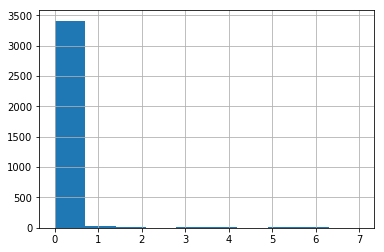

In [8]:
raw_data[raw_data.days_to_take_FT<=7].days_to_take_FT.hist()

In [9]:
didCFt= raw_data[raw_data.y=="Freemium"].days_to_take_FT.value_counts() 
# FT_didn't-Converted
print(didCFt)

0.0      1980
3.0        10
1.0         9
2.0         8
4.0         6
18.0        4
14.0        4
13.0        3
69.0        3
117.0       3
7.0         3
189.0       3
12.0        3
15.0        2
147.0       2
159.0       2
99.0        2
10.0        2
116.0       2
19.0        2
78.0        2
163.0       2
123.0       2
5.0         2
134.0       2
9.0         2
22.0        2
141.0       2
158.0       1
215.0       1
         ... 
104.0       1
226.0       1
219.0       1
106.0       1
184.0       1
102.0       1
170.0       1
131.0       1
187.0       1
55.0        1
68.0        1
34.0        1
24.0        1
20.0        1
51.0        1
157.0       1
75.0        1
143.0       1
185.0       1
27.0        1
113.0       1
129.0       1
111.0       1
109.0       1
52.0        1
17.0        1
30.0        1
201.0       1
180.0       1
6.0         1
Name: days_to_take_FT, Length: 99, dtype: int64


In [10]:
2606/(3077+2606)  #Percentage of people who take Ft and convert

0.45856061939116666

# Days_to_convert

In [11]:
raw_data.y.value_counts()

Freemium    58812
Premium      3024
Name: y, dtype: int64

In [12]:
ConvD=raw_data[raw_data.y=="Premium"].days_to_convert.value_counts() #Converted
print(ConvD)

 7.0      1168
 0.0       292
 6.0        62
 1.0        61
 2.0        48
 8.0        45
 3.0        42
 9.0        41
 10.0       32
 13.0       26
 11.0       26
 5.0        24
 16.0       23
 4.0        22
 21.0       22
 14.0       21
 38.0       21
 12.0       20
 26.0       16
 15.0       16
 25.0       16
 28.0       16
 20.0       15
 27.0       14
 19.0       14
 17.0       14
 23.0       13
 72.0       12
 29.0       12
 105.0      12
          ... 
 235.0       1
 198.0       1
 186.0       1
 190.0       1
 183.0       1
 162.0       1
 197.0       1
 166.0       1
 221.0       1
 210.0       1
-6.0         1
-2.0         1
 116.0       1
 220.0       1
 188.0       1
 189.0       1
 232.0       1
 234.0       1
 208.0       1
-4.0         1
 176.0       1
 152.0       1
 233.0       1
 192.0       1
 205.0       1
 216.0       1
 211.0       1
 182.0       1
 241.0       1
 135.0       1
Name: days_to_convert, Length: 224, dtype: int64


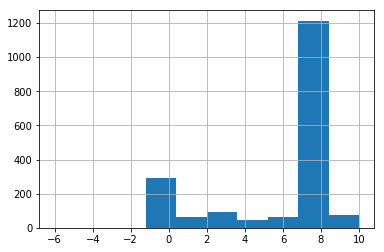

In [13]:
raw_data[raw_data.days_to_convert<=10].days_to_convert.hist()

In [14]:
columns=list(raw_data[raw_data.describe().columns])
columns.append('y')

In [15]:
gf=raw_data[columns]

In [16]:
print(gf['y'].value_counts())
Premium_count = len(gf[gf['y']=="Premium"])
Freemium_count  = len(gf[gf['y']=="Freemium"])
pct_of_Premium = Premium_count/(Premium_count+Freemium_count)
print("Percentage of Premium", pct_of_Premium*100)
pct_of_Freemium= Freemium_count/(Premium_count+Freemium_count)
print("Percentage of Freemium", pct_of_Freemium *100)

Freemium    58812
Premium      3024
Name: y, dtype: int64
Percentage of Premium 4.890355132932273
Percentage of Freemium 95.10964486706773


In [17]:
p_mean= gf.groupby('y').mean().T

In [18]:
p_mean=p_mean[p_mean>0.0]
p_mean=p_mean.dropna()


In [19]:
p_mean['Freemium'].values

array([5.32024240e+06, 5.55467290e+00, 7.16629814e+02, 3.87222152e+02,
       8.94494321e-01, 3.63871319e-02, 3.19324288e+00, 1.02019996e-04,
       8.45065633e-03, 2.01472489e-01, 1.40569952e+00, 1.21743862e-01,
       1.14262395e-02, 1.64949330e-01, 1.00964089e+00, 1.22075427e+00,
       1.64932327e-02, 6.90675372e-02, 9.21886690e-01, 6.83227913e-01,
       5.14809903e-01, 2.22653540e+00, 2.01523499e+00, 1.01489492e+00,
       8.63786302e-01, 1.75236346e-01, 7.40716180e-01, 2.22352581e-01,
       1.05488676e-01, 8.14459634e-03, 2.21043324e-03, 2.83513569e-01,
       3.58455757e+00, 1.25129225e+00, 1.84928246e+00, 2.88189485e-01,
       5.73012310e-03, 1.24707543e+00, 2.81405155e-02, 8.19560634e-03,
       1.34496361e-02, 3.50438686e-02, 4.02978984e-03, 1.07709311e+00,
       1.25739645e-01, 7.72291369e-02, 1.74607223e-01, 5.45806978e-03,
       3.52054003e-01, 2.43487724e-02, 4.28483983e-03, 4.69291981e-03,
       6.05981772e-01, 6.86934639e-03, 4.78507788e-01, 3.40066653e-02,
      

In [20]:
p_mean['Premium'].values

array([5.42032679e+06, 5.94268293e+00, 7.62709987e+02, 3.95991071e+02,
       9.24272487e-01, 5.42328042e-01, 7.36210317e+00, 3.30687831e-04,
       1.98412698e-02, 3.38293651e-01, 1.59226190e+00, 1.09788360e-01,
       2.05026455e-02, 1.34589947e-01, 1.01025132e+00, 1.55456349e+00,
       2.94312169e-02, 1.07473545e-01, 9.15343915e-01, 1.18220899e+00,
       2.74470899e-01, 2.99702381e+00, 2.64384921e+00, 1.06514550e+00,
       9.32539683e-01, 1.35912698e-01, 8.89880952e-01, 1.94113757e-01,
       5.91931217e-02, 1.91798942e-02, 1.09126984e-02, 4.75859788e-01,
       4.69179894e+00, 1.66865079e+00, 2.52182540e+00, 4.77182540e-01,
       1.58730159e-02, 1.66964286e+00, 9.72222222e-02, 4.19973545e-02,
       2.48346561e-01, 2.05026455e-01, 3.30687831e-02, 3.53406085e+00,
       5.05291005e-01, 3.60780423e-01, 6.41865079e-01, 8.59788360e-03,
       1.69345238e+00, 7.27513228e-02, 1.35582011e-02, 1.42195767e-02,
       4.84457672e-01, 7.63888889e-02, 1.79365079e+00, 4.78835979e-01,
      

In [21]:
p_mean.index

Index(['user_id', 'days_to_take_FT', 'screen_height', 'screen_width',
       'initial_assessment_completed', 'FT_start', 'OpenApp', 'LogOut',
       'S_DAPNewSkills', 'CloseApp', 'S_SPHome', 'S_SPLogin', 'SPForgotPass',
       'S_SPSignup', 'OBCreateUser', 'S_OBBabyName', 'OBCreateTwins',
       'S_OBPremature', 'OBNotification', 'S_Paywall', 'Paywall_Dismiss',
       'S_OB_Segmentation', 'OB_Segmentation_Answer', 'CreateBaby',
       'S_IAIntro', 'IAStraightToActivities', 'IAStartAssessment',
       'IASkipAssessment', 'MasterSkill', 'IAFinishSkill', 'S_HealthInterest',
       'IAFinishAssessment', 'IA_Continue', 'S_IA_Area_Results',
       'S_IA_Answer_Skill', 'S_IA_Summary', 'Share_IA', 'IA_Finish_Area',
       'Download', 'DAPChangeActivity', 'S_DAPPastPlansPremium',
       'DAPActivityCompleted', 'InviteFriends', 'DAPFullScreenActivity',
       'S_DAPMaterials', 'MilestonesUpdate', 'ArticleView', 'SlideshowView',
       'ActivityView', 'ClickInDAP', 'UpdateMilestones', 'S_UpdateMi

In [22]:
numerics=list(p_mean.index)
numerics

['user_id',
 'days_to_take_FT',
 'screen_height',
 'screen_width',
 'initial_assessment_completed',
 'FT_start',
 'OpenApp',
 'LogOut',
 'S_DAPNewSkills',
 'CloseApp',
 'S_SPHome',
 'S_SPLogin',
 'SPForgotPass',
 'S_SPSignup',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'OBNotification',
 'S_Paywall',
 'Paywall_Dismiss',
 'S_OB_Segmentation',
 'OB_Segmentation_Answer',
 'CreateBaby',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'IAFinishAssessment',
 'IA_Continue',
 'S_IA_Area_Results',
 'S_IA_Answer_Skill',
 'S_IA_Summary',
 'Share_IA',
 'IA_Finish_Area',
 'Download',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'InviteFriends',
 'DAPFullScreenActivity',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'UpdateMilestones',
 'S_UpdateMilestones',
 'LifeSpent',
 'PPPaymentFail',
 'P

# Correlations



In [23]:
numerics.append('y')

In [24]:
numerics= raw_data[numerics]

In [25]:
cleanup_nums = {"y":{'Premium':1, 'Freemium':0}}

In [26]:
numerics.replace(cleanup_nums, inplace=True)

In [27]:
correlation = numerics.corr()
matrix_cols = correlation.columns.tolist()
corr_array  = np.array(correlation)

trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [28]:
correlation=correlation.mask(np.tril(np.ones(correlation.shape)).astype(np.bool)) # convert lower triangle of values to NaNs

In [29]:
correlations= correlation.stack().reset_index()
correlations.columns=['V1','V2','Corr']



In [30]:
correlations.loc[correlations['Corr']>.70].reset_index() #variables to remove given the positive correlation to avoid collinearity



index                  V1                      V2      Corr
0     501            FT_start          FreeTrialStart  0.945641
1    1740   S_OB_Segmentation  OB_Segmentation_Answer  0.978444
2    2416  IAFinishAssessment       S_IA_Area_Results  0.745485
3    2418  IAFinishAssessment            S_IA_Summary  0.964933
4    2420  IAFinishAssessment          IA_Finish_Area  0.749591
5    2477         IA_Continue       S_IA_Area_Results  0.856509
6    2478         IA_Continue       S_IA_Answer_Skill  0.803480
7    2481         IA_Continue          IA_Finish_Area  0.855474
8    2538   S_IA_Area_Results       S_IA_Answer_Skill  0.805059
9    2539   S_IA_Area_Results            S_IA_Summary  0.762096
10   2541   S_IA_Area_Results          IA_Finish_Area  0.996396
11   2600   S_IA_Answer_Skill          IA_Finish_Area  0.805285
12   2658        S_IA_Summary          IA_Finish_Area  0.766470
13   3056       InviteFriends                RWInvite  0.821256
14   3422    UpdateMilestones      S_UpdateMilestones  0.965642
15   3807  ManageSubscription        S_MySubscription  0.970484
16   3808  ManageSubscription         ReasonsToCancel  0.761239
17   3811  ManageSubscription         S_Reason_NoTime  0.726423
18   3812  ManageSubscription       S_FeaturesYouLose  0.730540
19   3840    S_MySubscription         ReasonsToCancel  0.749649
20   3843    S_MySubscription         S_Reason_NoTime  0.753050
21   3844    S_MySubscription       S_FeaturesYouLose  0.731212
22   3874     ReasonsToCancel         S_Reason_NoTime  0.907689
23   3875     ReasonsToCancel       S_FeaturesYouLose  0.931363
24   3876     ReasonsToCancel      CancelSubscription  0.863619
25   3962     S_Reason_NoTime       S_FeaturesYouLose  0.899651
26   3963     S_Reason_NoTime      CancelSubscription  0.842065
27   3990   S_FeaturesYouLose      CancelSubscription  0.925724
28   4051    S_MenuFamilyHome       S_MenuUserProfile  0.813073
29   4277     TAPCallToAction        S_PremiumProcess  0.993659

In [31]:
correlations.loc[correlations['Corr']<-.70].reset_index() #variables to remove given the negative correlation to avoid collinearity



Empty DataFrame
Columns: [index, V1, V2, Corr]
Index: []

In [32]:
to_keep = list(numerics.columns)
not_keep=['FreeTrialStart','OB_Segmentation_Answer','S_IA_Area_Results','S_IA_Summary','IA_Finish_Area','S_IA_Answer_Skill','RWInvite','S_UpdateMilestones','S_MySubscription','ReasonsToCancel','S_Reason_NoTime','S_FeaturesYouLose','CancelSubscription','S_MenuUserProfile','S_PremiumProcess']
for element in not_keep:
    if element in to_keep:
        to_keep.remove(element)
to_keep

['user_id',
 'days_to_take_FT',
 'screen_height',
 'screen_width',
 'initial_assessment_completed',
 'FT_start',
 'OpenApp',
 'LogOut',
 'S_DAPNewSkills',
 'CloseApp',
 'S_SPHome',
 'S_SPLogin',
 'SPForgotPass',
 'S_SPSignup',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'OBNotification',
 'S_Paywall',
 'Paywall_Dismiss',
 'S_OB_Segmentation',
 'CreateBaby',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'IAFinishAssessment',
 'IA_Continue',
 'Share_IA',
 'Download',
 'DAPChangeActivity',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'InviteFriends',
 'DAPFullScreenActivity',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'SlideshowView',
 'ActivityView',
 'ClickInDAP',
 'UpdateMilestones',
 'LifeSpent',
 'PPPaymentFail',
 'PPPaymentStarted',
 'S_RWDashboard',
 'SkillsMilestoneLearnMore',
 'S_ProgressHome',
 'ManageSubscription',
 'FeaturesToTry',
 'S_R

In [33]:
len(to_keep)

79

In [34]:
for i in to_keep:
    print(i)

user_id
days_to_take_FT
screen_height
screen_width
initial_assessment_completed
FT_start
OpenApp
LogOut
S_DAPNewSkills
CloseApp
S_SPHome
S_SPLogin
SPForgotPass
S_SPSignup
OBCreateUser
S_OBBabyName
OBCreateTwins
S_OBPremature
OBNotification
S_Paywall
Paywall_Dismiss
S_OB_Segmentation
CreateBaby
S_IAIntro
IAStraightToActivities
IAStartAssessment
IASkipAssessment
MasterSkill
IAFinishSkill
S_HealthInterest
IAFinishAssessment
IA_Continue
Share_IA
Download
DAPChangeActivity
S_DAPPastPlansPremium
DAPActivityCompleted
InviteFriends
DAPFullScreenActivity
S_DAPMaterials
MilestonesUpdate
ArticleView
SlideshowView
ActivityView
ClickInDAP
UpdateMilestones
LifeSpent
PPPaymentFail
PPPaymentStarted
S_RWDashboard
SkillsMilestoneLearnMore
S_ProgressHome
ManageSubscription
FeaturesToTry
S_Reason_Activities
S_MenuFamilyHome
S_MenuSetReminders
MenuHelp
MenuMemberStats
MenuFamilyInvite
MenuChangeBirthday
MenuSkipVideo
MenuTellMyFriends
S_MenuEditBaby
MenuFamilyDefault
S_MenuFamilyProfile
TAPCallToAction
S_C